# Tratamento de Dados

## Bibliotecas

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

from scipy import stats

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/webscraping_calculadora_de_aluguel/main/df_zapimoveis.csv', delimiter ='|', encoding='utf-8-sig')

In [100]:
df.head()

,property_describe,price,area,room,bath,garage,address
0,"O melhor prédio da Cidade Alta, entre Tirol e ...",R$ 340.000,71 m²,3,3,2,"Rua Princesa Isabel, Cidade Alta"
1,"Piso Laminado no Quarto, Piso Laminado na Sala...",R$ 149.990,41 - 44 m²,2,1,1,"Avenida Moema Tinoco da Cunha Lima, Pajuçara"
2,Condomínio fechado com apartamentos de 2 quart...,R$ 152.990,41 m²,2,1,1,"Avenida Moema Tinoco da Cunha Lima, Zona Norte"
3,Apartamento Edifício Carlos Silva - 120 m² O A...,R$ 430.000,120 m²,3,5,3,"Rua Jaguarari, Barro Vermelho"
4,"Excelente apartamento com 2 quartos, sendo 1 s...",R$ 235.000,55 m²,2,1,1,"Pitimbu, Natal"


In [101]:
df.duplicated().sum()

5

In [102]:
df.drop_duplicates(inplace=True)

In [103]:
df.shape

(2321, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   property_describe  2321 non-null   object
 1   price              2321 non-null   object
 2   area               2321 non-null   object
 3   room               2321 non-null   object
 4   bath               2315 non-null   object
 5   garage             2321 non-null   object
 6   address            2321 non-null   object
dtypes: object(7)
memory usage: 145.1+ KB


In [105]:
df.isna().sum()

property_describe    0
price                0
area                 0
room                 0
bath                 6
garage               0
address              0
dtype: int64

## Tratamento por coluna

In [106]:
def trans_values(df, col):
  return df[col].str.replace(r"\ -.*","").str.replace(r"\ m.*","").astype(float)

### Bath

Tipos de dados presentes na feature:

In [107]:
df['bath'].value_counts()

2        1149
3         425
1         384
4         230
5         107
6          16
7           2
3 - 4       1
11          1
Name: bath, dtype: int64

Ajustando os valores não numéricos:

In [108]:
df['bath'] = trans_values(df, 'bath')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Aplicando aos valores nulos o valor da mediana:

In [109]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [110]:
df['bath'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


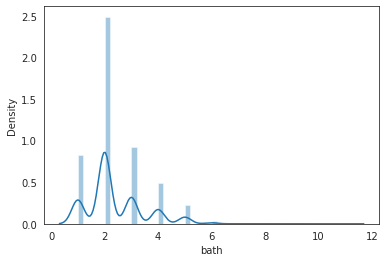

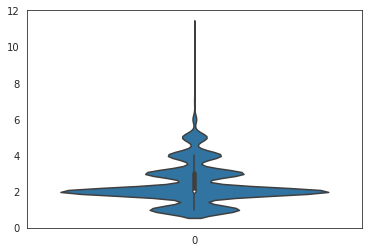

In [111]:
sns.distplot(df['bath'])
plt.show()
sns.violinplot(data=df['bath'])
plt.show()

### Room

In [112]:
df['room'].value_counts()

3        1135
2        1002
4         118
1          51
5           4
2 - 3       3
2 - 4       2
1 - 2       2
1 - 3       1
3 - 4       1
3 - 6       1
6           1
Name: room, dtype: int64

In [113]:
df['room'] = trans_values(df, 'room')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


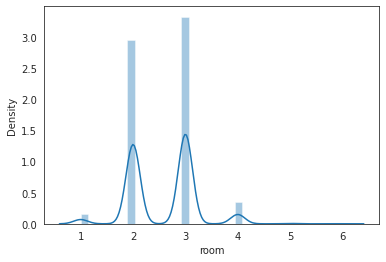

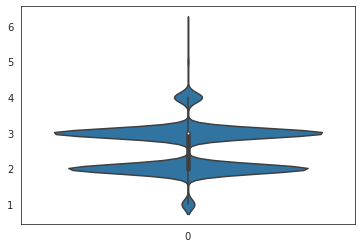

In [114]:
sns.distplot(df['room'])
plt.show()
sns.violinplot(data=df['room'])
plt.show()

### Garage

In [115]:
df['garage'].value_counts()

2        1145
1        1016
3         130
4          21
1 - 2       2
1 - 3       2
1 - 4       2
5           1
6           1
19          1
Name: garage, dtype: int64

In [116]:
df['garage'] = trans_values(df, 'garage')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


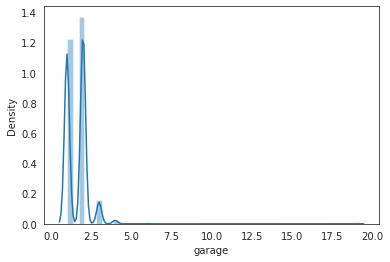

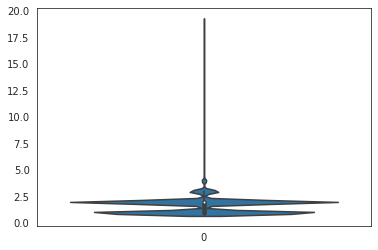

In [117]:
sns.distplot(df['garage'])
plt.show()
sns.violinplot(data=df['garage'])
plt.show()

### Area

In [118]:
df['area'].value_counts()

55 m²      185
56 m²      142
57 m²      128
75 m²       71
60 m²       69
          ... 
122 m²       1
1252 m²      1
187 m²       1
405 m²       1
239 m²       1
Name: area, Length: 172, dtype: int64

In [119]:
df['area'] = trans_values(df, 'area')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


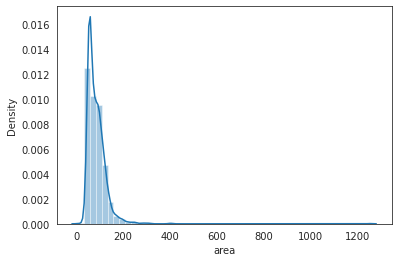

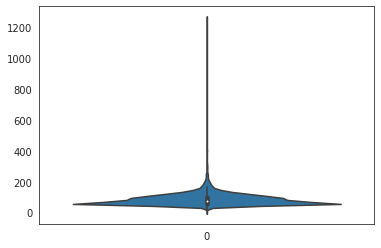

In [120]:
sns.distplot(df['area'])
plt.show()
sns.violinplot(data=df['area'])
plt.show()

### Price

In [121]:
df['price'].value_counts()

R$ 220.000    66
R$ 250.000    57
R$ 350.000    53
R$ 240.000    52
R$ 450.000    43
              ..
R$ 149.900     1
R$ 372.427     1
R$ 597.763     1
R$ 549.160     1
R$ 102.000     1
Name: price, Length: 533, dtype: int64

In [122]:
df = df.drop(df[df["price"]=='Sob consulta'].index)

In [123]:
df['price'] = df['price'].str.replace(r"R$ ", "", regex=False)
df['price'] = df['price'].str.replace(r".", "", regex=False)
df['price'] = df['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


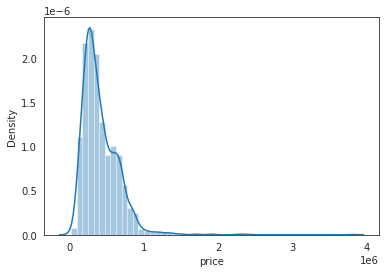

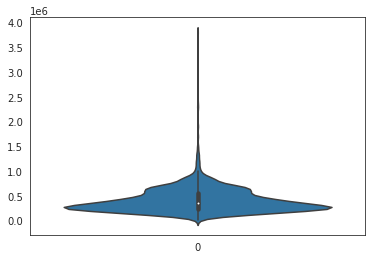

In [124]:
sns.distplot(df['price'])
plt.show()
sns.violinplot(data=df['price'])
plt.show()

### Adress

In [125]:
df['address'].value_counts()

Lagoa Nova, Natal                                             168
Tirol, Natal                                                  115
Ponta Negra, Natal                                            101
Capim Macio, Natal                                             94
Avenida Deputado Antônio Florêncio de Queiroz, Ponta Negra     79
                                                             ... 
Rua Lino Gomes da Silva, Sao Jose                               1
Travessa São Vicente, Lagoa Nova                                1
Travessa São Cristóvão, Lagoa Nova                              1
Rua Pôr-do-Sol, Ponta Negra                                     1
Rua Perito José Lourenço, Lagoa Nova                            1
Name: address, Length: 422, dtype: int64

In [126]:
# Separando o bairro do endereço
df[['address1','address2']] = df.address.str.split(pat=', ', expand=True)

In [127]:
df['neigh'] = np.where(df['address2'] =='Natal', df['address1'], df['address2'])

In [128]:
df.drop(columns= ['address', 'address1', 'address2'], axis=1, inplace=True)

In [129]:
df['neigh'].value_counts()

Lagoa Nova                 464
Ponta Negra                370
Tirol                      316
Capim Macio                278
Candelária                 141
Barro Vermelho             123
Neópolis                   105
Petrópolis                  97
Pitimbu                     86
Planalto                    60
Dix-sept Rosado             41
Nossa Senhora de Nazaré     34
Ribeira                     25
Nova Descoberta             23
Alecrim                     21
Lagoa Seca                  17
Cidade Alta                 16
Areia Preta                 14
Cidade da Esperança         13
Rocas                       13
Pajuçara                    11
Zona Norte                   9
Praia do Meio                8
PARNAMIRIM                   4
Altiplano Cabo Branco        3
Redinha                      3
Cidade Satelite              3
Manaíra                      2
Cidade Nova                  2
Cidade Verde                 2
Ponta De Campina             2
Vila Cabral                  1
Camboinh

In [130]:
zonasul = ['Zona Sul', 'Ponta Negra', 'Capim Macio', 'Lagoa Nova', 'Candelária', 'Neópolis', 'Pitimbu', 'Nova Descoberta', 'Cidade Satelite', 'Cidade Jardim', 'Alagamar']
zonaleste = ['Zona Leste', 'Tirol', 'Barro Vermelho', 'Petrópolis', 'Ribeira', 'Alecrim', 'Lagoa Seca', 'Cidade Alta', 'Areia Preta', 'Praia do Meio', 'Santos Reis']
zonaoeste = ['Zona Oeste', 'Planalto', 'Dix-sept Rosado', 'Nossa Senhora de Nazaré', 'Cidade da Esperança', 'Rocas', 'Cidade Nova', 'Guarapés', 'Bom Pastor']
grandenatal = ['Grande Natal', 'Macaiba','PARNAMIRIM','Cidade Verde']
zonanorte = ['Zona Norte', 'Pajuçara', 'Zona Norte', 'Redinha'] 
fora_da_cidade = ['Fora da cidade', 'Altiplano Cabo Branco', 'Manaíra', 'Ponta De Campina', 'Vila Cabral', 'Camboinha', 'Bela Vista', 'Catole', 'Sao Jose', 'Lauritzen', 'Cabo Branco', 'Tambaú']

In [131]:
for zona in [zonasul, zonaleste, zonaoeste, grandenatal, zonanorte, fora_da_cidade]:
  for bairro in zona:
    df['neigh'] = np.where(df['neigh'] == bairro, zona[0], df['neigh'])

In [132]:
df.head()

,property_describe,price,area,room,bath,garage,neigh
0,"O melhor prédio da Cidade Alta, entre Tirol e ...",340000.0,71.0,3.0,3.0,2.0,Zona Leste
1,"Piso Laminado no Quarto, Piso Laminado na Sala...",149990.0,41.0,2.0,1.0,1.0,Zona Norte
2,Condomínio fechado com apartamentos de 2 quart...,152990.0,41.0,2.0,1.0,1.0,Zona Norte
3,Apartamento Edifício Carlos Silva - 120 m² O A...,430000.0,120.0,3.0,5.0,3.0,Zona Leste
4,"Excelente apartamento com 2 quartos, sendo 1 s...",235000.0,55.0,2.0,1.0,1.0,Zona Sul


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_describe  2320 non-null   object 
 1   price              2320 non-null   float64
 2   area               2320 non-null   float64
 3   room               2320 non-null   float64
 4   bath               2320 non-null   float64
 5   garage             2320 non-null   float64
 6   neigh              2320 non-null   object 
dtypes: float64(5), object(2)
memory usage: 209.5+ KB


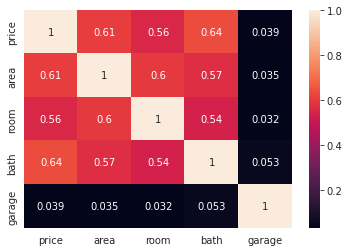

In [134]:
sns.heatmap(df.corr(), annot=True)

In [135]:
feat_num = ['price', 'area', 'room', 'bath', 'garage']

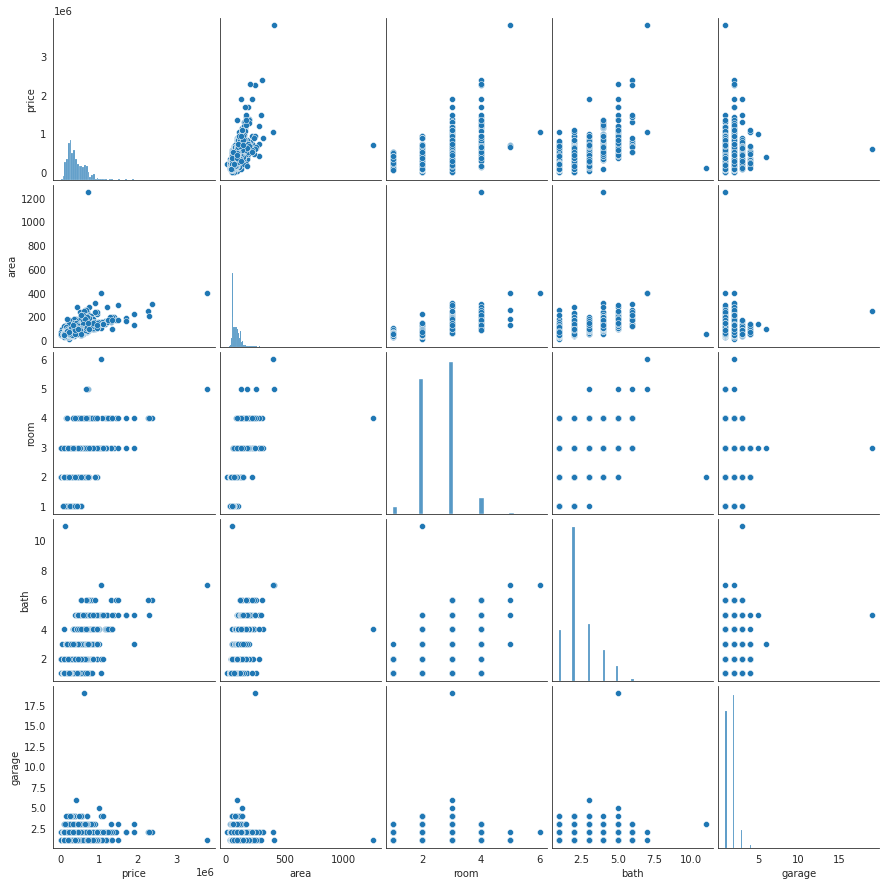

In [46]:
sns.pairplot(df[feat_num])

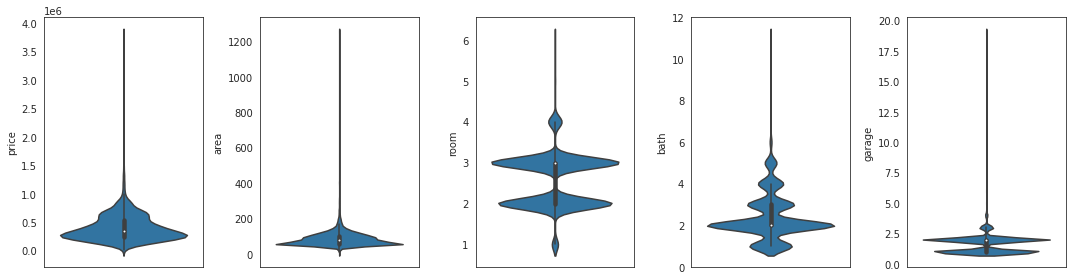

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

### Remoção de Outliers

In [137]:
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z<3)]

In [138]:
df = z_score_remove(df, 'price')
df = z_score_remove(df, 'area')
df = z_score_remove(df, 'garage')

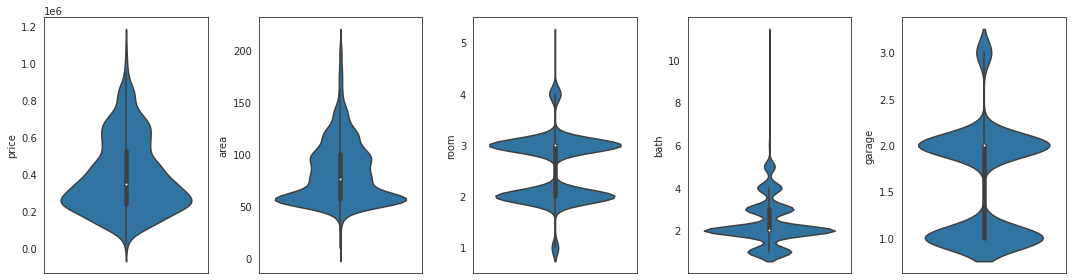

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

In [140]:
df.shape

(2251, 7)

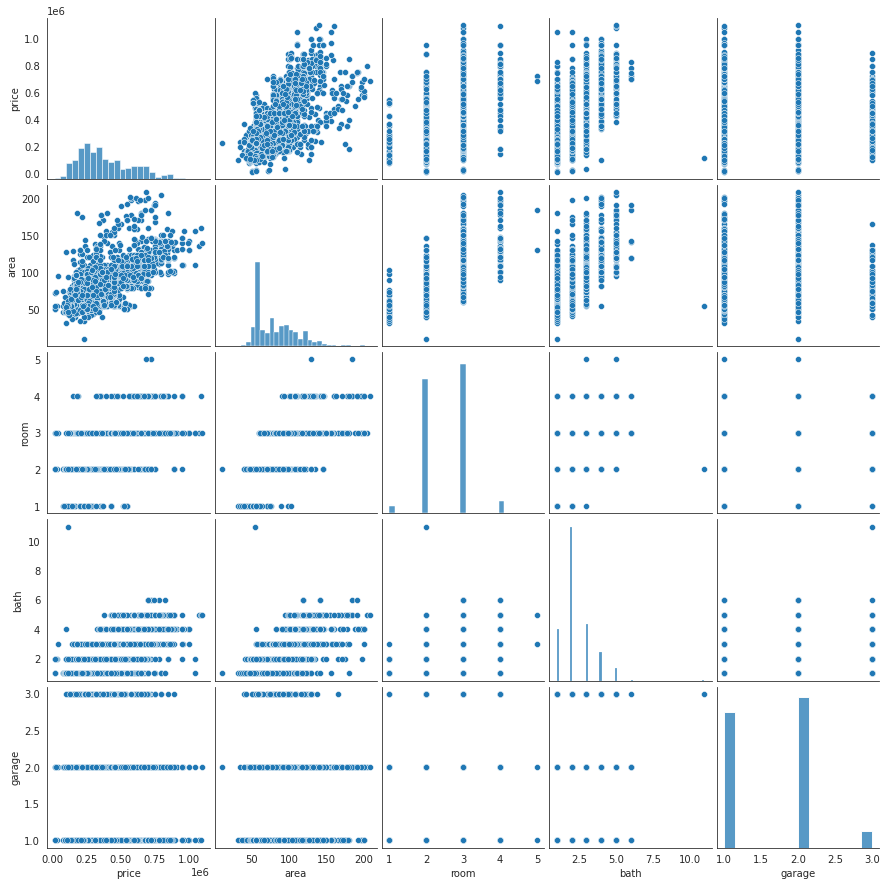

In [141]:
sns.pairplot(df[feat_num])

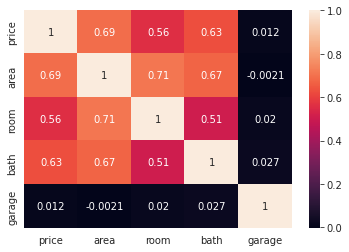

In [142]:
sns.heatmap(df.corr(), annot=True)

In [147]:
df.groupby(by=df['neigh'])['price'].mean()

neigh
Fora da cidade    357752.750000
Grande Natal      183857.142857
Zona Leste        425823.181373
Zona Norte        183825.217391
Zona Oeste        237542.103030
Zona Sul          398181.611421
Name: price, dtype: float64

In [149]:
df = df[~df['neigh'].isin(['Fora da cidade'])]

### Exportando resultado

In [150]:
df.head()

,property_describe,price,area,room,bath,garage,neigh
0,"O melhor prédio da Cidade Alta, entre Tirol e ...",340000.0,71.0,3.0,3.0,2.0,Zona Leste
1,"Piso Laminado no Quarto, Piso Laminado na Sala...",149990.0,41.0,2.0,1.0,1.0,Zona Norte
2,Condomínio fechado com apartamentos de 2 quart...,152990.0,41.0,2.0,1.0,1.0,Zona Norte
3,Apartamento Edifício Carlos Silva - 120 m² O A...,430000.0,120.0,3.0,5.0,3.0,Zona Leste
4,"Excelente apartamento com 2 quartos, sendo 1 s...",235000.0,55.0,2.0,1.0,1.0,Zona Sul


In [151]:
df = df.drop(columns= 'property_describe')

In [152]:
df.head()

,price,area,room,bath,garage,neigh
0,340000.0,71.0,3.0,3.0,2.0,Zona Leste
1,149990.0,41.0,2.0,1.0,1.0,Zona Norte
2,152990.0,41.0,2.0,1.0,1.0,Zona Norte
3,430000.0,120.0,3.0,5.0,3.0,Zona Leste
4,235000.0,55.0,2.0,1.0,1.0,Zona Sul


In [153]:
df.to_csv('train_test.csv', encoding='utf-8-sig')